Mean Squared Error: 0.8978112039040097
R^2 Score: 0.9902580483384559


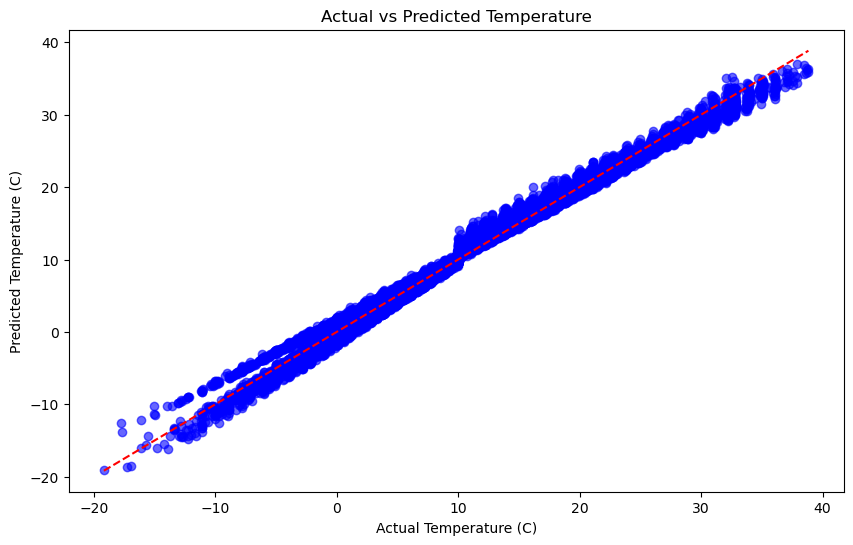

                    Feature  Coefficient
0  Apparent Temperature (C)     0.873450
7          Precip Type_snow     0.406080
6          Precip Type_rain     0.362715
2         Wind Speed (km/h)     0.080129
4           Visibility (km)     0.008708
5      Pressure (millibars)    -0.000204
3    Wind Bearing (degrees)    -0.000405
1                  Humidity    -1.401944


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('weatherHistory.csv')

# Preprocessing
# Drop columns with limited or redundant information
data = data.drop(['Formatted Date', 'Summary', 'Daily Summary', 'Loud Cover'], axis=1)

# Handle missing values
data['Precip Type'] = data['Precip Type'].fillna('none')  # Fill missing Precip Type with 'none'

# Encode categorical variable 'Precip Type'
data = pd.get_dummies(data, columns=['Precip Type'], drop_first=True)

# Features and target
X = data.drop(['Temperature (C)'], axis=1)  # Independent variables
y = data['Temperature (C)']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal prediction line
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Actual vs Predicted Temperature')
plt.show()

# Print model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))
